<a href="https://colab.research.google.com/github/Aprilianiput21/TA_Model-ETp/blob/main/RF_Model_Rs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import library
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
#load data target dan fitur (Excel)
target_data = pd.read_excel('/Data_Target.xlsx')
target_variable = target_data['ETo']

#feature_data = pd.read_excel('Data_Target.xlsx')
features_variable = target_data['Rad']

In [ ]:
target_data.head()


,Day,Avg Temp,Humidity,Wind,Sun,Rad,ETo
0,1,26.0,84,0.3,7.2,17.2,3.24
1,2,25.7,87,0.1,7.2,17.1,3.20
2,3,26.2,80,0.3,7.2,17.1,3.23
3,4,26.1,79,0.2,7.2,17.1,3.18
4,5,26.6,81,0.2,7.2,17.0,3.23


In [ ]:
# Split data untuk data fitur dan target
X = features_variable
y = target_variable

#Split data untuk train dan test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [ ]:
#Random Forest Model
model = RandomForestRegressor(n_estimators = 150, criterion='squared_error', max_depth =5)

In [ ]:
#X_train_reshaped = np.reshape(X_train, (-1, 1))
#print(X_train.shape)
X_train_reshaped = X_train.values.reshape(-1, 1)
X_test_reshaped = X_test.values.reshape(-1, 1)

#Pelatihan model untuk data training
model.fit(X_train_reshaped, y_train)

RandomForestRegressor(max_depth=5, n_estimators=150)

In [ ]:
#Prediksi pada data training dan test
x_pred = model.predict(X_train_reshaped)
y_pred = model.predict(X_test_reshaped)

# Evaluasi model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


print(f"Mean Squared Error : {mse: .2f}")
print(f"R-squared: {r2: .2f}")


Mean Squared Error :  0.00
R-squared:  0.98


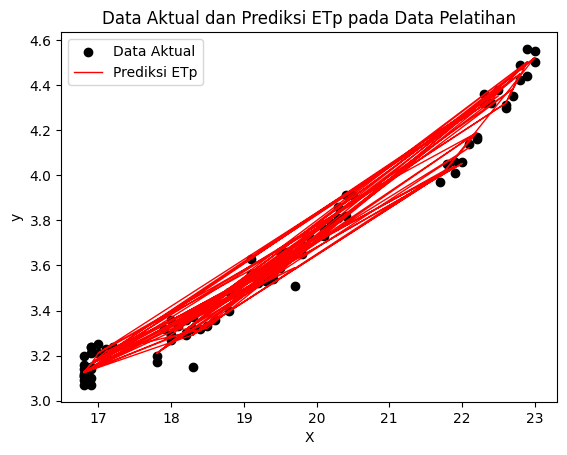

In [ ]:
import matplotlib.pyplot as plt
# Plot data aktual dan prediksi pada data pelatihan
plt.scatter(X_train, y_train, color='black', label='Data Aktual')
plt.plot(X_train, x_pred, color='red', label='Prediksi ETp', linewidth=1)
plt.title('Data Aktual dan Prediksi ETp pada Data Pelatihan')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()


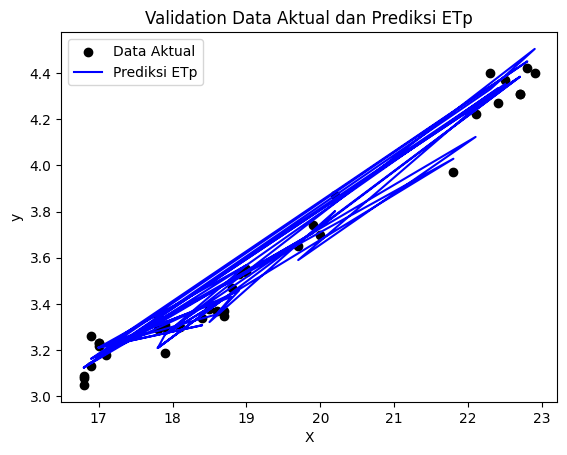

In [ ]:
#Plot pada data test
plt.scatter(X_test, y_test, color = 'black', label = 'Data Aktual')
plt.plot(X_test, y_pred, color='blue', label='Prediksi ETp')
plt.title('Validation Data Aktual dan Prediksi ETp')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()